*by:* ***Igor Mercês***

---


# Análise de dados do Airbnb - Nova York
A startup Airbnb é considerada a **maior empresa hoteleira** da atualidade sem possuir um **único hotel**.

Presente em 190 países, o Airbnb pratica o modelo de negócio do tipo plataforma multilateral, conectando turístas (consumidores) a donos de locais para hospedágem (fornecedores) em sua plataforma digital de maneira **prática** e **inovadora**.

Até junho de 2023, a Startup fundada em 2008, já havia **hospedado mais de 1,5 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. *(fonte: https://news.airbnb.com/br/about-us/)*

Com o objetivo de fornecer dados para análises dos impacto do Airbnb na economia imobiliária local, o portal open source [inside Airbnb](http://insideairbnb.com/get-the-data.html) extrai dados da própria plataforma do Airbnb para algumas das principais cidades do mundo e os disponibiliza em seu site para consulta pública. Desta forma, é possível obter uma grade quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flogosmarcas.net%2Fwp-content%2Fuploads%2F2020%2F07%2FAirbnb-Logo-2014-Presente.jpg&f=1&nofb=1"></center>

**Neste *notebook*, são analisados os dados referentes à cidade de Nova York, em busca de *insights* que podem ser extraídos a partir de dados brutos.**

## A cidade de Nova York

<center><img alt="Analisando Airbnb" width="75%" src="https://www.stgeorgeutah.com/wp-content/uploads/2018/05/New-York-City-Getty-STGnews.jpg"></center>

Com uma economia de **1,7 trilhões de dólares**, o estado de Nova York se fosse um país, seria a **11ª maior economia do mundo** [segudo a Forbes](https://www.forbes.com/places/ny/?sh=636a98d56a76). Desta forma, a sua capital, a cidade de Nova York, é considerada um dos **principais destinos econômicos e turísticos do mundo**.

Nova York, a cidade que nunca dorme, é uma metrópole exuberante e cosmopolita que cativa visitantes com sua diversidade artística e sua paisagem urbana impressionante. Os icônicos e imponentes arranha-céus, como o Empire State Building, decoram o horizonte, enquanto pontos turísticos como a Estátua da Liberdade e o Central Park oferecem experiências inesquecíveis. Os teatros da Broadway proporcionam espetáculos de classe mundial, refletindo o protagonismo artístico e cultural da cidade. Museus renomados, como o Metropolitan Museum of Art, entregam uma experiêmcia cultural muito rica para seus visitantes, enquanto bairros como Chinatown e Little Italy proporcionam uma viagem gastronômica única. NYC, como também é conhecida a cidade, é um incrível local de compras, eventos e shows, como a Quinta avenida e suas boutiques de luxo, o SoHO e suas galerias de arte e a famosa Times Square com seus letreiros luminosos e multidões de visitantes dia e noite.

Por todos esses aspectos, a cidade de Nova York possui uma enorme demanda de infraestrutura no setor turístico. Com mais de **56 milhões de visitantes no ano de 2022**, [segundo o governo de Nova York](https://www.state.gov/reporting-tours-foreign-press-centers/new-york-citys-tourism-economy), NYC oferece uma variedade de opções de hospedagens, desde hoteis de luxo a acomodações mais acessíveis. Neste cenário está inserida a plataforma do Airbnb ampliando as opções para aqueles que visitam a cidade.

## Obtenção de dados
Todos os dados deste projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória será utilizado apenas o arquivo

*   `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).*

Observação: O portal Inside Airbnb mantém o seu *dataset* em constante atualização e, em determinado momento, o conjunto de dados utilizado neste notebook pode ter sofrido atualização que possa provocar diferenças de resultados para esta versão do projeto. Porém, isto não inviabiliza a reutilização deste notebook, sendo necessária apenas uma nova execução do *dataset* de entrada.




In [ ]:
# importação de pacotes necessários
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importação do arquivo listing.csv para um Dataframe
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-12-04/visualisations/listings.csv")

## Análise dos dados
Nesta etapa inicial, temos o objetivo de conhecer os dados e observar como eles estão estruturados. Além disso, é possível criar uma consicência situacional básica para a relação entre as variáveis que serão analisadas.

**Discionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Nome do grupo ao qual o bairro pertence
* `neighbourhood` - Nome do bairro onde se encontra a propriedade
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para aluguel do imóvel
* `minimum_nights` - Quantidade mínima de noites para reserva
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade do imóvel dentro de 365 dias
* `number_of_reviews_ltm` - Quantiade de reviews no último mês
* `license` - Não há informação sobre esta coluna

Antes de iniciar qualquer análise, observamos as **5 primeiras entradas** do *dataset*.

In [ ]:
#mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,339,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.28,2,88,0,NaN
2,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,2023-08-14,1.08,1,142,4,NaN
3,6872,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,2022-06-05,0.05,2,359,0,NaN
4,6990,Rental unit in New York · ★4.88 · 1 bedroom · ...,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,70,30,246,2023-08-14,1.43,1,93,4,NaN


### **Quantidade de atributos (variáveis) e entradas existentes no conjunto de dados e tipos das variáveis**
Nesta etapa, identificamos a quantidade de entradas e de variáveis do *dataset* assim como os tipos destas variáveis.

In [ ]:
#identificar o volume de dados do dataset
print(f'Entrada:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}\n')

#verificar os tipos das variáveis do dataset
df.dtypes

Entrada:	39627
Variáveis:	18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### Porcentagem de valores ausentes no dataset
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. No início da análise exploratória é importante identificar se existem valores nulos ou ausentes e se estes são significativos quando comparados com o total de entradas existentes.

In [ ]:
#quantidade de valores auxentes por variável
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            15
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11480
reviews_per_month                 11480
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35268
dtype: int64

In [ ]:
#exibir a porcentagem em ordem decrescente das variáveis pelos seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.889999
reviews_per_month                 0.289701
last_review                       0.289701
host_name                         0.000379
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64


É possível identificar que:
*   A coluna `license` aproximadamente 90% dos seus valores ausentes.
*   As colunas `reviews_per_month` e `last_review` possuem aproximadamente 29% dos seus valores ausentes.
*   A coluna `host_name` possui aproximadamente 0,03% de valores ausentes.


### Distribuição das variáveis
Para visualizar a distribuição das variáveis, um histograma é muito útil.

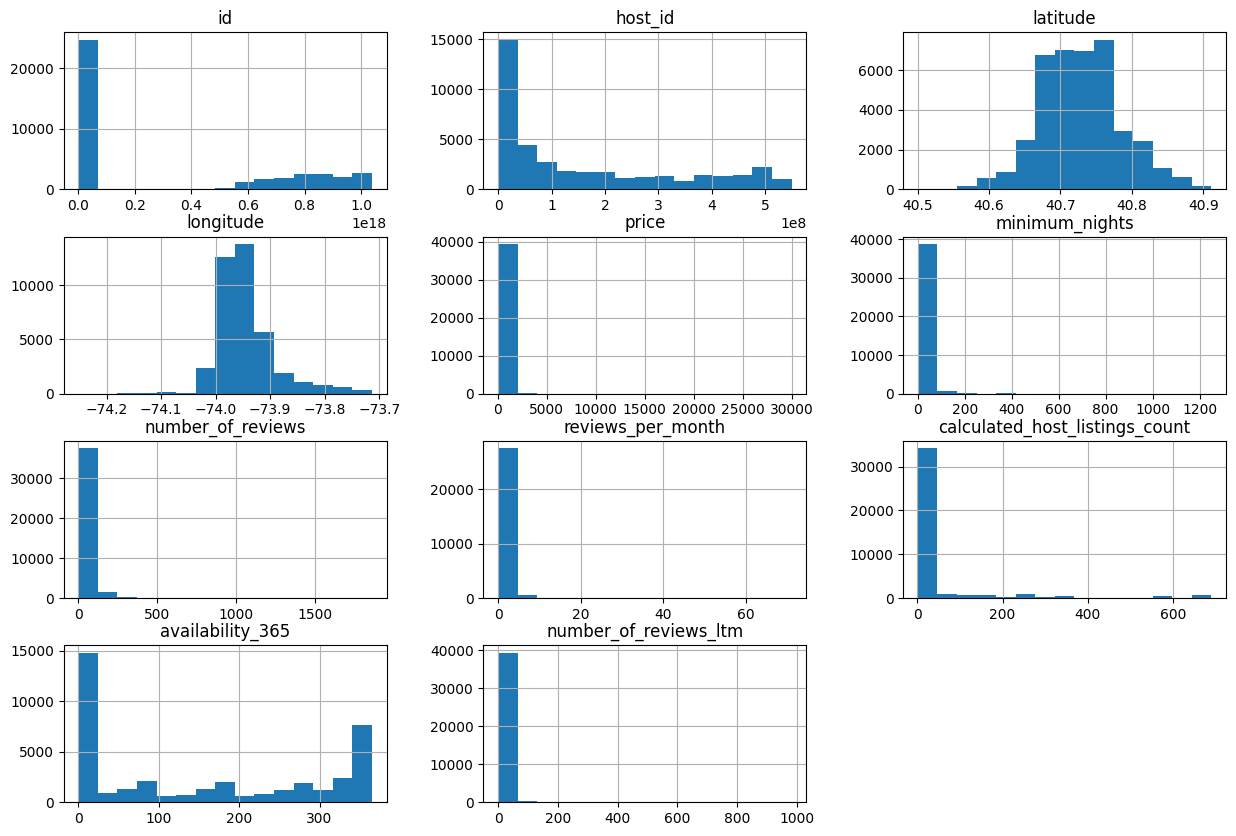

In [ ]:
#plotar histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Verificação de *Outliers*
Pela distribuição dos histogramas, é possível observar a presença de *outliers*, como por exemplo nas variáveis `price` e `minimum_nights`.

*Outliers* não seguem uma distruição e distorcem toda a representação gráfica. Há duas maneiras rápidas que auxiliam na detecção de *outliers* e estas são:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


#### Resumo estatístico

In [ ]:
#utilizar o método describe para obter o resumo estatístico
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,39627.000000,39627.000000,39627.000000,28147.000000,39627.000000,39627.000000,39627.000000
mean,208.816464,30.051127,25.251520,1.021708,41.852197,153.721276,6.264088
std,482.380712,29.290027,57.718207,1.716199,124.056880,147.391076,16.602446
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,75.000000,30.000000,0.000000,0.110000,1.000000,0.000000,0.000000
50%,127.000000,30.000000,4.000000,0.390000,1.000000,122.000000,0.000000
75%,214.000000,30.000000,22.000000,1.415000,6.000000,319.000000,4.000000
max,30000.000000,1250.000000,1857.000000,71.160000,691.000000,365.000000,983.000000


Observando o resumo estatístico acima, podemos destacar que:


*   A variável `price` possui 75% dos seus valores abaixo de 214, porém possui valor máximo de 300000.
*   A variável `minimum_nights` (mínimo de noites) possui valor máximo de 1250, acima de 365 noites.



####Boxplot para price

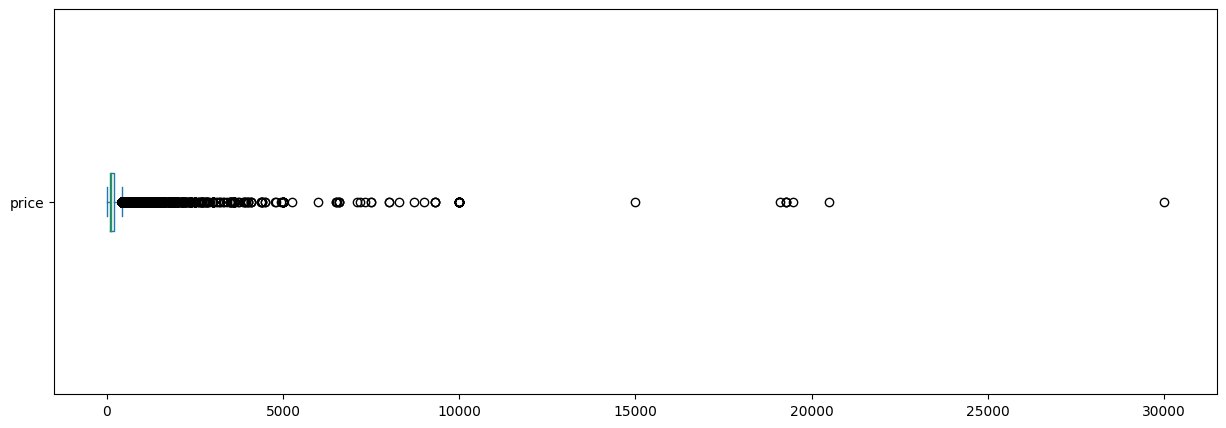


Valores acima de 500:
-- 2386 entradas
-- 6.0211% em relação ao total


In [ ]:
#boxplot para a variável price
df.price.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

#ver quantidade de valores acima de 500
print("\nValores acima de 500:")
print(f'-- {df[df.price > 500].shape[0]} entradas')
print(f'-- {(df[df.price > 500].shape[0] / df.shape[0])*100:.4f}% em relação ao total')

####Boxplot para minimum_nights

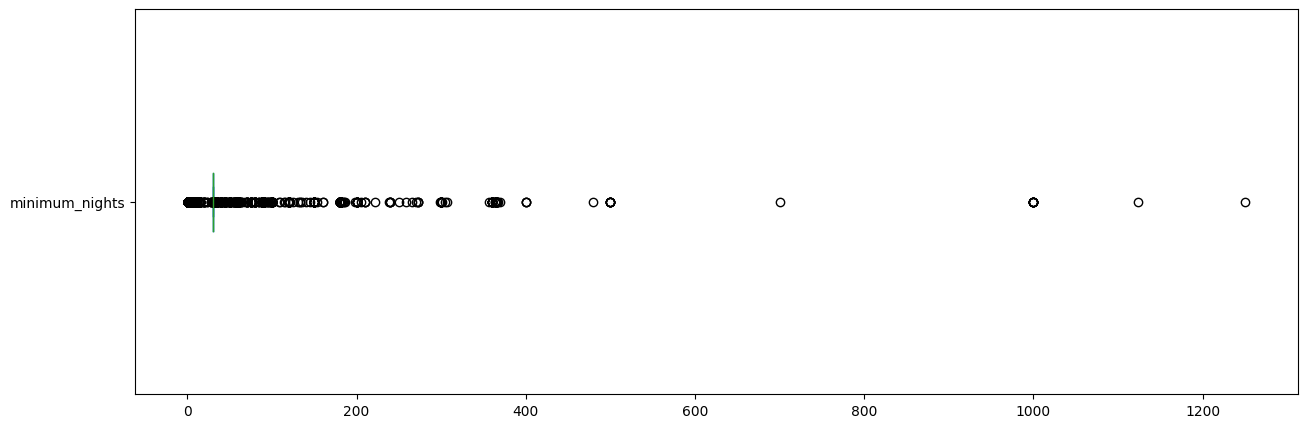


Valores acima de 30:
-- 2374 entradas
-- 5.9909% em relação ao total


In [ ]:
#boxplot para variável a minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

#ver quantidade de valores acima de 30
print('\nValores acima de 30:')
print(f'-- {df[df.minimum_nights > 30].shape[0]} entradas')
print(f'-- {(df[df.minimum_nights > 30].shape[0] / df.shape[0])*100:.4f}% em relação ao total')

#### Histograma sem *outliers*
Após a idendificação dos *outliers*, podemos limpar o *dataframe* retirando estes valores das variáveis `price` e `minimum_nights` e, em seguida, plotar um novo histograma.

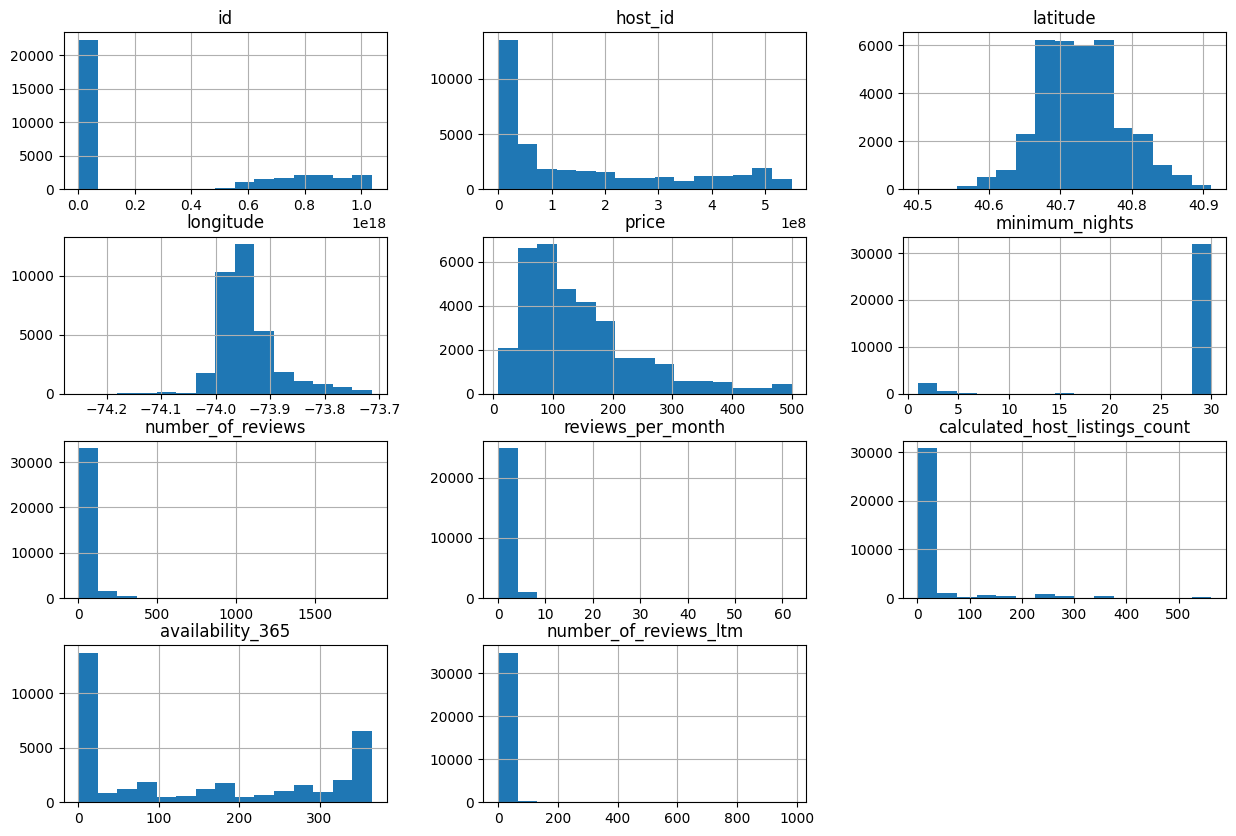

In [ ]:
#copiar o dataframe
df_limpo = df.copy()

#remover os outliers do novo dataframe
df_limpo.drop(df_limpo[df_limpo.price > 500].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index, axis=0, inplace=True)

#remover variável license, pois é vazia
df_limpo.drop('license', axis=1, inplace=True)

#plotar histograma para as variáveis numéricas
df_limpo.hist(bins=15, figsize=(15, 10));

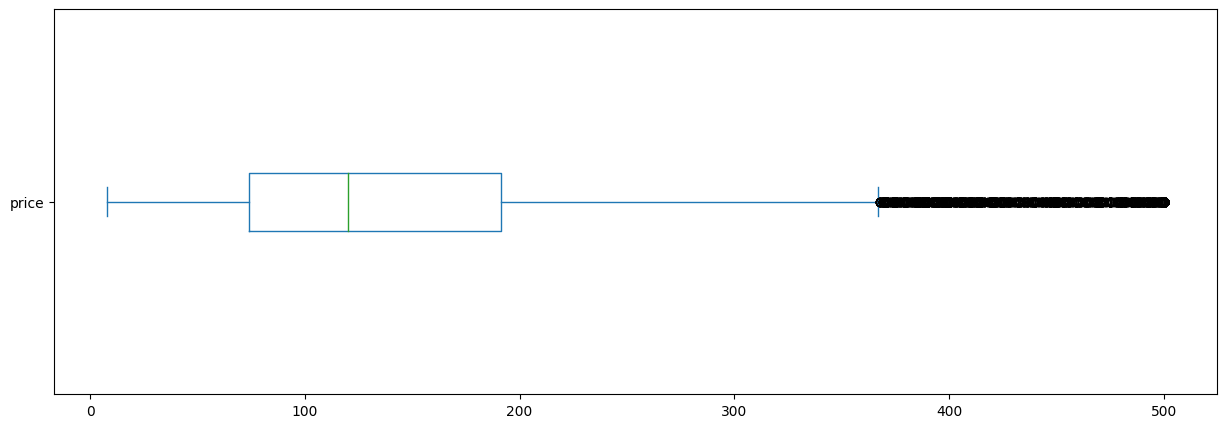

In [ ]:
#boxplot para variável a minimum_nights
df_limpo.price.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

### Correlação entre as variáveis
A correlação descreve a associação entre duas variáveis. Para sabermos a relação linear entre as variáveis do *dataset*, estabelecemos o coeficiente de correlação por meio de duas etapas:


*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`



In [ ]:
#criar matriz do coeficiente de correlação
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.269114,0.023917,0.110034,-0.099951,0.102113,0.074602
minimum_nights,-0.269114,1.000000,-0.098611,-0.308124,-0.093494,-0.036436,-0.181926
number_of_reviews,0.023917,-0.098611,1.000000,0.620466,-0.129249,0.067827,0.629014
reviews_per_month,0.110034,-0.308124,0.620466,1.000000,-0.097810,0.152425,0.881771
calculated_host_listings_count,-0.099951,-0.093494,-0.129249,-0.097810,1.000000,0.126980,-0.107015
availability_365,0.102113,-0.036436,0.067827,0.152425,0.126980,1.000000,0.104193
number_of_reviews_ltm,0.074602,-0.181926,0.629014,0.881771,-0.107015,0.104193,1.000000


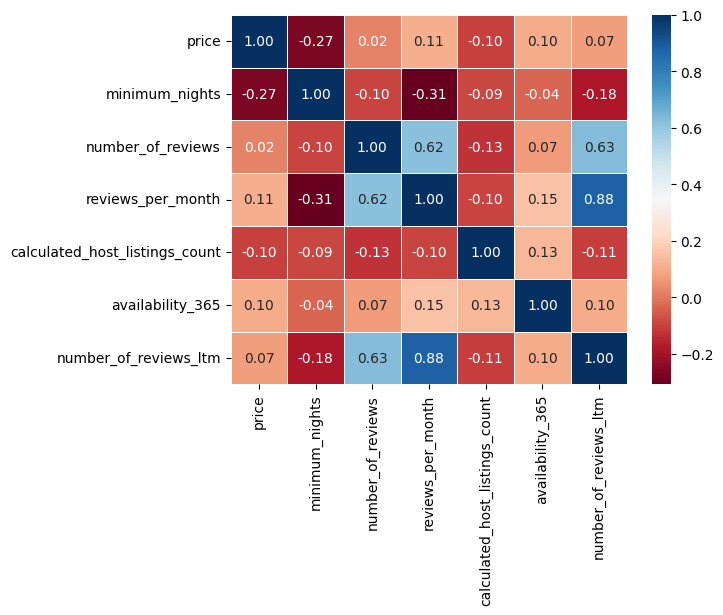

In [ ]:
#plotar heatmap utilizando seaborn
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f', linewidths=0.5);

### Tipo de imóvel mais frequente no Airbnb
A variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências e o tipo de cada aluguel, usando o método `value_counts()`.

In [ ]:
#mostrar quantidade e tipo de aluguéis disponíveis
df_limpo.room_type.value_counts()

Entire home/apt    18335
Private room       16092
Shared room          518
Hotel room            59
Name: room_type, dtype: int64

In [ ]:
#mostrar a frequência em porcentagem
(df_limpo.room_type.value_counts() / df_limpo.shape[0])*100

Entire home/apt    52.379728
Private room       45.971889
Shared room         1.479831
Hotel room          0.168552
Name: room_type, dtype: float64

### Bairros mais valorizados de Nova York

<center><img alt="Analisando Airbnb" width="60%" src="https://s-media-cache-ak0.pinimg.com/originals/eb/8f/82/eb8f82555f88f8364929e5e829702caf.jpg"></center>


A cidade de Nova York é composta por 5 grandes bairros (boroughs): **Manhattan**, **Brooklyn**, **Queens**, **Bronx** e **Staten Island**

Desta forma podemos classificar os bairros segundo a média do preço do aluguel.

In [ ]:
#agrupa neighbourhood_group e calcula a média de preço
df_value_nb_group = df_limpo.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False).to_frame()

#conta a quantidade de entradas para cada neighbourhood_group
df_value_nb_group_count = df_limpo.neighbourhood_group.value_counts().to_frame()

#junta os dois dataframes anteriores
df_value_nb_group_merge = df_value_nb_group.merge(df_value_nb_group_count, how='left', left_index=True, right_index=True)

#nomeia as colunas
df_value_nb_group_merge.columns = ['price', 'quantity']
df_value_nb_group_merge

,price,quantity
neighbourhood_group,,
Manhattan,175.358393,14286
Brooklyn,133.141581,13321
Staten Island,117.202346,341
Queens,111.661675,5743
Bronx,109.796649,1313


A ilha de Manhattan é a parte mais famosa e valorizada da cidade de Nova York. Localizada no centro da cidade, concentra a maior quantidade de vizinhanças nobres e pontos turísticos como a Broadway, Times Square e o Central Park.

Por estes motivos, Manhattan aparece na tabela acima como o bairro mais valorizado da cidade e também oferencendo a maior quantidade de imóveis disponíveis para aluguel.

### Vizinhanças mais caras em Nova York
Utilizando o método `groupby`, vamos agrupar os valores para `neighbourhood` (vizinhanças) e `neighbourhood_group` e comparamos eles a partir do preço de locação.

In [ ]:
#agrupa neighbourhood e calcula a média de preço
df_value_group = df_limpo.groupby(['neighbourhood', 'neighbourhood_group'], as_index=False).price.mean().sort_values(by='price', ascending=False)[:25].set_index('neighbourhood')

#conta a quantidade de entradas para cada neighbourhood
df_value_group_count = df_limpo.neighbourhood.value_counts().to_frame()

#junta os dois dataframes anteriores
df_value_group_merge = df_value_group.merge(df_value_group_count, how='left', left_index=True, right_index=True)

#nomeia as colunas
df_value_group_merge.columns = ['neighbourhood_group', 'price', 'quantity']
df_value_group_merge

,neighbourhood_group,price,quantity
neighbourhood,,,
Neponsit,Queens,295.000000,1
Tribeca,Manhattan,268.050000,100
Spuyten Duyvil,Bronx,252.000000,3
Lighthouse Hill,Staten Island,250.000000,1
DUMBO,Brooklyn,248.166667,24
SoHo,Manhattan,244.500000,190
Flatiron District,Manhattan,236.437500,64
Mill Basin,Brooklyn,234.333333,6
West Village,Manhattan,229.832461,382


In [ ]:
#contagem de valores na coluna neighbourhood_group
df_value_group_merge.neighbourhood_group.value_counts()

Manhattan        13
Brooklyn          4
Bronx             3
Staten Island     3
Queens            2
Name: neighbourhood_group, dtype: int64

Das 25 vizinhanças com a maior média de preço, **13 estão no bairro de Manhattan**.

Mesmo para quem não é familiarizado com as vizinhanças de Nova York, após uma pequisa rápida, podemos nos informar que locais como **Soho**, **Tribeca** e **Flatiron District** são umas das vizinhanças mais valorizados da cidade. Porém, na lista acima observamos que um locais modestos como Neponsit e Lighthouse Hill ocupam posições superiores às vizinhanças conhecidamente mais valorizados.

Pela tabela anterior, observamos que existe apenas um anúncio para Neponsit e para Lighthouse Hill. Vamos verificar este fato na fonte de dados.

In [ ]:
#ver quantidade de imóveis em Willowbrook
quantidade = df_limpo.query('neighbourhood == ["Neponsit", "Lighthouse Hill"]').shape[0]
print(f'Entradas:\t{quantidade}')

#ver as entradas com imóveis em Willowbrook e Lighthouse Hill
df_limpo.query('neighbourhood == ["Neponsit", "Lighthouse Hill"]')


Entradas:	2


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2323,4033422,Rental unit in Staten Island · ★4.65 · 1 bedro...,20911928,Judith,Staten Island,Lighthouse Hill,40.57716,-74.14087,Entire home/apt,250,30,57,2023-04-05,0.53,1,337,1
11846,24910361,Guesthouse in Neponsit · ★5.0 · 1 bedroom · 1 ...,188328775,Donna,Queens,Neponsit,40.56948,-73.85941,Entire home/apt,295,30,29,2023-06-19,0.44,1,178,2


Podemos observar que as vizinhanças de **Neponsit** e **Lighthouse Hill** possuem ambos 1 imóvel disponível. A pouca quantidade de imóvel nesses locais causa uma **falsa realidade** de que a média de preço do aluguel é **alta**.


Esta conclusão também pode ser feita para a vizinhança de **Spuyten Duyvil** que, apesar de ser uma localidade de classe média, possui apenas 3 imóveis disponíveis. Além disso, 1 imóvel possui um valor muito mais alto comparados com os outros 2, o que contribui para o aumento médio do preço de todo esta vizinhança.

In [ ]:
#ver quantidade de imóveis em Spuyten Duyvil
print(f'Entradas:\t{df_limpo[df_limpo.neighbourhood == "Spuyten Duyvil"].shape[0]}')

#ver as entradas com imóveis em Spuyten Duyvil
df_limpo[df_limpo.neighbourhood == 'Spuyten Duyvil']

Entradas:	3


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
363,385824,Guest suite in Riverdale · ★4.74 · 2 bedrooms...,1931205,Orit,Bronx,Spuyten Duyvil,40.880950,-73.917010,Entire home/apt,151,30,146,2023-10-09,1.58,1,365,27
11479,23669006,Place to stay in Bronx · ★4.88 · 4 bedrooms · ...,2965556,Mj,Bronx,Spuyten Duyvil,40.882360,-73.911290,Entire home/apt,425,30,8,2019-06-16,0.12,1,0,0
28408,711501151642222800,Townhouse in The Bronx · 1 bedroom · 1 bed · 1...,48793181,Claudio,Bronx,Spuyten Duyvil,40.880953,-73.917324,Private room,180,30,0,NaN,NaN,1,365,0


### Mapa dos imóveis
É possível plotar cada imóvel no mapa utilizando as suas informações de **latitude** e **longitude**. Para isso, podemos utilizar um gráfico de **dispersão** com as coordenadas `x=longitude` e `y=latitude` e uma escala de cores para os preços do aluguel.

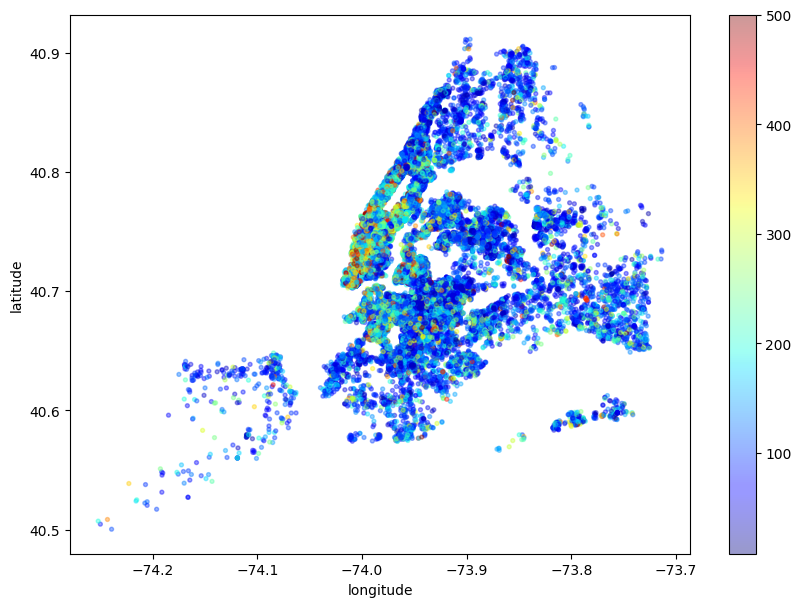

In [ ]:
# plotar os imóveis pela latitude e longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(10,7), );

## Conclusão

Neste projeto, foi feita uma análise superficial da base de dados do Airbnb, porém foi possível perceber a existência de *outliers* em algumas variáveis que distorcem as informações estatísticas retirada do conjunto inteiro de dados.

A presença de bairros com poucos imóveis foi fundamental para afirmar a hipótese dos *outliers* e contribuiram para que houvesse um tratamento da base de dados utilizada.

O *dataset* utilizado é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completo, com mais atributos disponíveis para uma análise mais detalhada, permitindo atribuir conlcusões mais profundas aos dados analisados.